<a href="https://colab.research.google.com/github/LerinaMM/influencers/blob/main/Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectar o Dataset a partir do Drive

In [1]:
!wget -P "/content/drive/MyDrive/Bases de Dados/instagram.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


# Importar Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Verificação dos dados

In [3]:
Dados = pd.read_csv('/content/drive/MyDrive/Bases de Dados/instagram.csv')

In [4]:
Dados.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [5]:
#Ultimos dados do conjunto

Dados.tail()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K
999,zoesugg,Zoë Sugg,Lifestyle,Business & Careers,9.4M,United Kingdom,208.7K,289.3K


# Informações sobre o conjunto de dados

In [6]:
#Quantidade de dados do conjunto

Dados.shape

(1000, 8)

O conjunto possui 1000 linhas e 8 colunas

In [7]:
#Nome das colunas disponíveis
Dados.columns

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

In [8]:
#Verificação se temos dados duplicados
Dados.duplicated().sum()

0

Nao temos dados duplicados no dataset

In [9]:
#Verificação das colunas que possuem valores integrais nulos

Dados.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

POdemos notar que a partir da coluna chamada category_2, temos 713 linhas com dados vazios.

In [10]:
#Informações sobre o tipo de variável

Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [11]:
Dados.describe()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [12]:
#Verificando dados duplicados de influencers

Dados.drop_duplicates(subset= ['Influencer insta name'], inplace=True)

In [13]:
#Renomeando as colunas de category_1 e category_2

Dados.rename({'category_1':'Category', 'Audience country(mostly)':'Audience Country'}, axis=1, inplace=True)
Dados.rename({'Subscribes':'Followers',},axis=1, inplace=True)

In [14]:
Dados = Dados.drop(['Influencer insta name','Authentic engagement\r\n'],axis=1)

In [15]:
Dados.head()

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [16]:
Dados_insta=['Followers','Engagement avg\r\n']

In [ ]:
#A função "convert" recebe um argumento "x", que deve ser uma string contendo um ou mais números. A função utiliza a função "findall" da biblioteca "re" para procurar todos os números na string "x" e retorná-los em uma lista

In [17]:
import re

In [18]:
def convert(x):
  return re.findall('\d+\.?\d*',x)

In [19]:
def update(data,data_update):
  for i in data_update:
        data['new'+i]=data[i].apply(convert)
        data['new'+i]=data['new'+i].apply(lambda x: "".join(x))
        data['new'+i]=pd.to_numeric(data['new'+i])
        data['new'+i]=np.where(['M' in j for j in data[i]],data['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in data[i]],data['new'+i]*1000,data['new'+i]))
  return data

In [20]:
update(Dados,Dados_insta)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


In [21]:
Dados['Engagement Rate']=np.round((Dados['newEngagement avg\r\n']/Dados['newFollowers'])*100,3)

In [22]:
Dados['Followers'].unique()

array(['48.5M', '12.7M', '18.8M', '13.5M', '11.1M', '7.9M', '25M', '3M',
       '4.9M', '4.1M', '13.2M', '6.5M', '19.8M', '27.9M', '58.3M',
       '17.2M', '7.2M', '8.8M', '28.9M', '8.2M', '13.6M', '40.5M',
       '49.7M', '34.2M', '2.6M', '8.3M', '31.5M', '10M', '12M', '61.1M',
       '5.1M', '10.8M', '22.4M', '13.4M', '15.8M', '21.1M', '61.8M', '8M',
       '9.1M', '6.8M', '17.6M', '27M', '16.2M', '12.4M', '9.2M', '5.6M',
       '8.1M', '24.1M', '15.2M', '6.7M', '30M', '6.3M', '6.1M', '21.9M',
       '5.5M', '7.7M', '39M', '16.3M', '12.6M', '13.9M', '14.9M', '20.3M',
       '17.8M', '22.6M', '35.5M', '19M', '11.4M', '34.5M', '57.5M',
       '10.7M', '8.5M', '27.4M', '13M', '302.3M', '9.7M', '28M', '9.5M',
       '21.5M', '6.6M', '14.6M', '13.3M', '21.4M', '23.1M', '14.1M',
       '25.3M', '30.5M', '38.5M', '125.1M', '10.4M', '16M', '35.4M',
       '20.2M', '7.1M', '50.7M', '50.6M', '14.3M', '25.2M', '16.8M',
       '246.9M', '16.4M', '14.2M', '17.7M', '7.8M', '101.7M', '11.5M',
     

# Quantidade de influencers por grupo de quantidade de seguidores

In [23]:
Dados['Followers'].value_counts()

6M        11
9.7M      10
13.9M      9
5.5M       9
8.2M       9
          ..
41.2M      1
64.8M      1
40.1M      1
21.3M      1
136.1M     1
Name: Followers, Length: 411, dtype: int64

In [24]:
Dados['Followers'].str[-1].unique()

array(['M'], dtype=object)

# Dividindo os dados de newFollowers por 1M

In [25]:
Dados['newFollowers']=Dados['newFollowers']/1000000

In [26]:
Dados = Dados.drop(['Engagement avg\r\n', 'newEngagement avg\r\n'],axis=1)

In [27]:
Dados = Dados.drop(['category_2'],axis=1)

In [28]:
Dados.head()

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,11.1M,Indonesia,11.1,27.928


# Influencers ou paginas com maior número de seguidores

In [29]:
Dados.sort_values(by='newFollowers',ascending=False,ignore_index=True)

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,Instagram,Photography,487.2M,India,487.2,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,India,419.6,1.668
2,Kylie 🤍,Fashion,323.3M,United States,323.3,3.805
3,Leo Messi,Sports with a ball,315.4M,Argentina,315.4,1.680
4,Selena Gomez,Music,308.2M,United States,308.2,1.428
...,...,...,...,...,...,...
992,Drew Starkey,NaN,3.2M,United States,3.2,37.500
993,GeorgeNotFound,NaN,3.1M,United States,3.1,35.484
994,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,3M,South Korea,3.0,33.260
995,HAECHAN,NaN,2.7M,NaN,2.7,77.778


#Verificação dos influencers

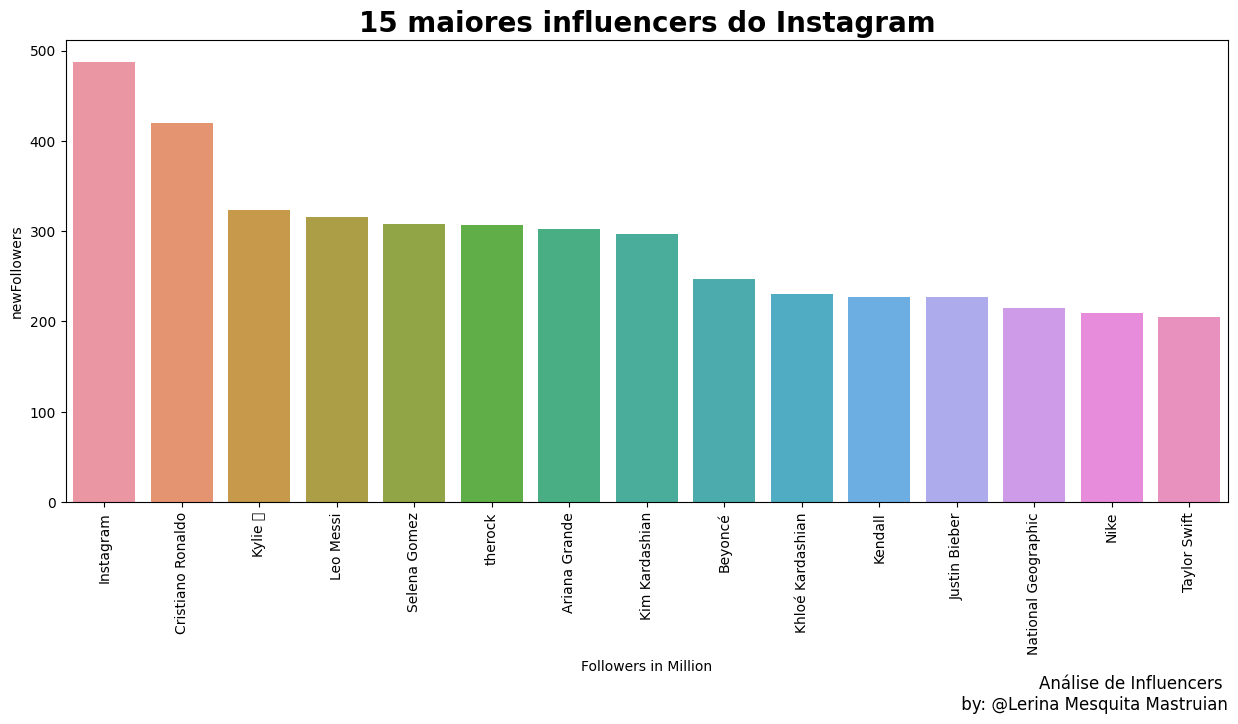

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='instagram name',y='newFollowers',data=Dados.sort_values(by='newFollowers',ascending=False).head(15))
plt.xticks(rotation = 90)
plt.title('15 maiores influencers do Instagram', fontsize=20, fontweight='bold')
plt.xlabel('Followers in Million')
plt.annotate(
    'Análise de Influencers \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.45), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

# Categorias de Influencers

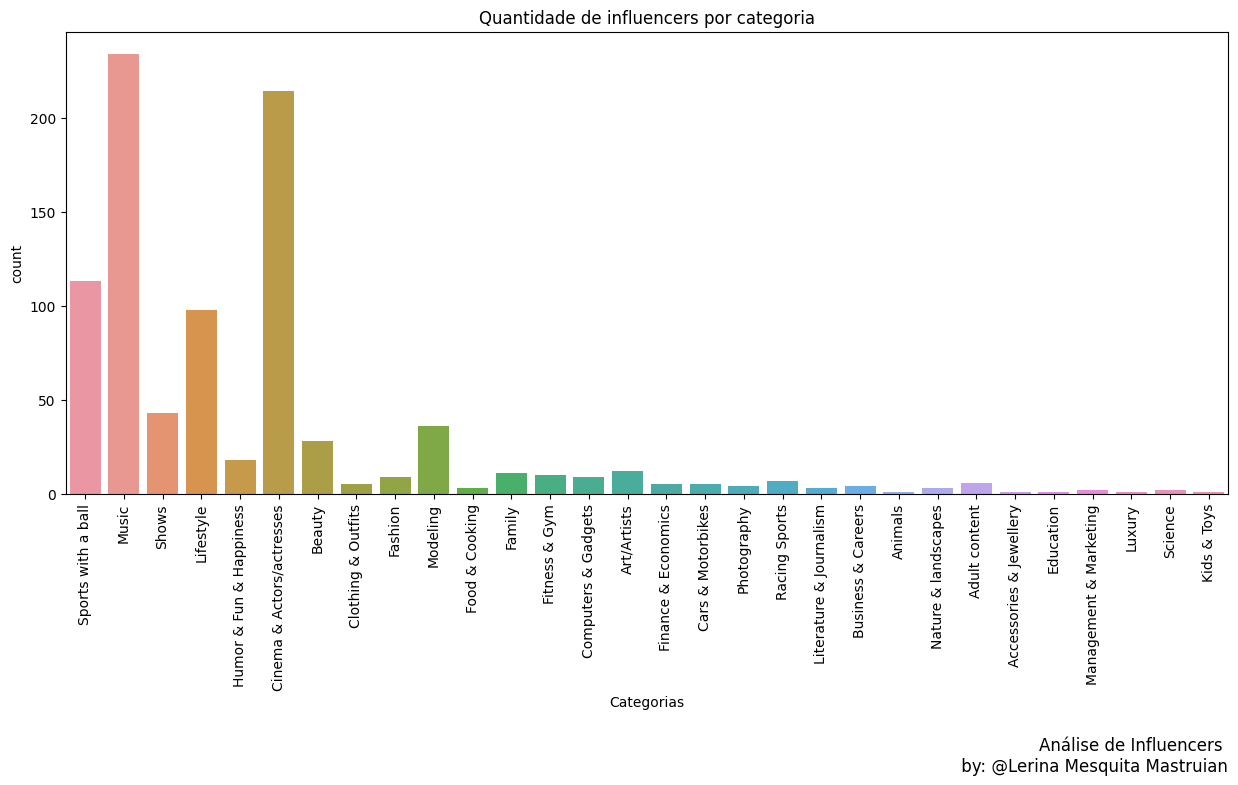

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Category', data=Dados)
plt.xticks(rotation = 90)
plt.title('Quantidade de influencers por categoria')
plt.xlabel('Categorias')
plt.annotate(
    'Análise de Influencers \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.60), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

In [47]:
def plot(Dados):
    plt.figure(figsize=(8,6))
    plt.xlabel('Numero de vezes que a categoria ocorreu')
    plt.ylabel('Categoria')
    plt.title('Quantidade de influencers por categoria')
    Dados['Category'].value_counts().sort_values(ascending=True).plot.barh()

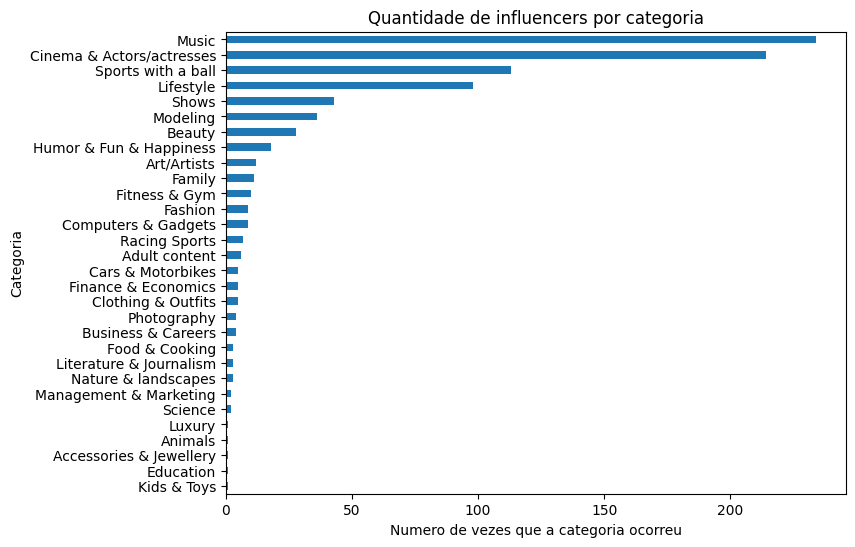

In [48]:
plot(Dados)

In [46]:
Dados['Audience Country'].unique()

array(['Spain', 'Indonesia', 'Russia', 'Brazil', 'Poland', 'South Korea',
       'United States', 'Thailand', 'India', 'Iraq', 'Morocco', 'Turkey',
       nan, 'Mexico', 'Chile', 'Iran', 'Italy', 'Colombia', 'Argentina',
       'Philippines', 'United Kingdom', 'Germany', 'Nigeria', 'Serbia',
       'Albania', 'United Arab Emirates', 'China', 'France', 'Japan',
       'Egypt', 'Syria', 'Algeria', 'Ukraine'], dtype=object)

In [41]:
Dados['Audience Country'].value_counts()

United States           279
Brazil                  151
India                   148
Indonesia               134
Mexico                   45
Spain                    34
Russia                   24
Argentina                23
Iran                     23
United Kingdom           20
Turkey                   16
Italy                    13
Colombia                 13
South Korea              13
Philippines               7
France                    6
Thailand                  6
Iraq                      5
Egypt                     5
Germany                   3
Morocco                   3
Nigeria                   2
Japan                     2
Chile                     1
Algeria                   1
Syria                     1
Serbia                    1
China                     1
United Arab Emirates      1
Albania                   1
Poland                    1
Ukraine                   1
Name: Audience Country, dtype: int64

# Países com maior quantidade de influencers

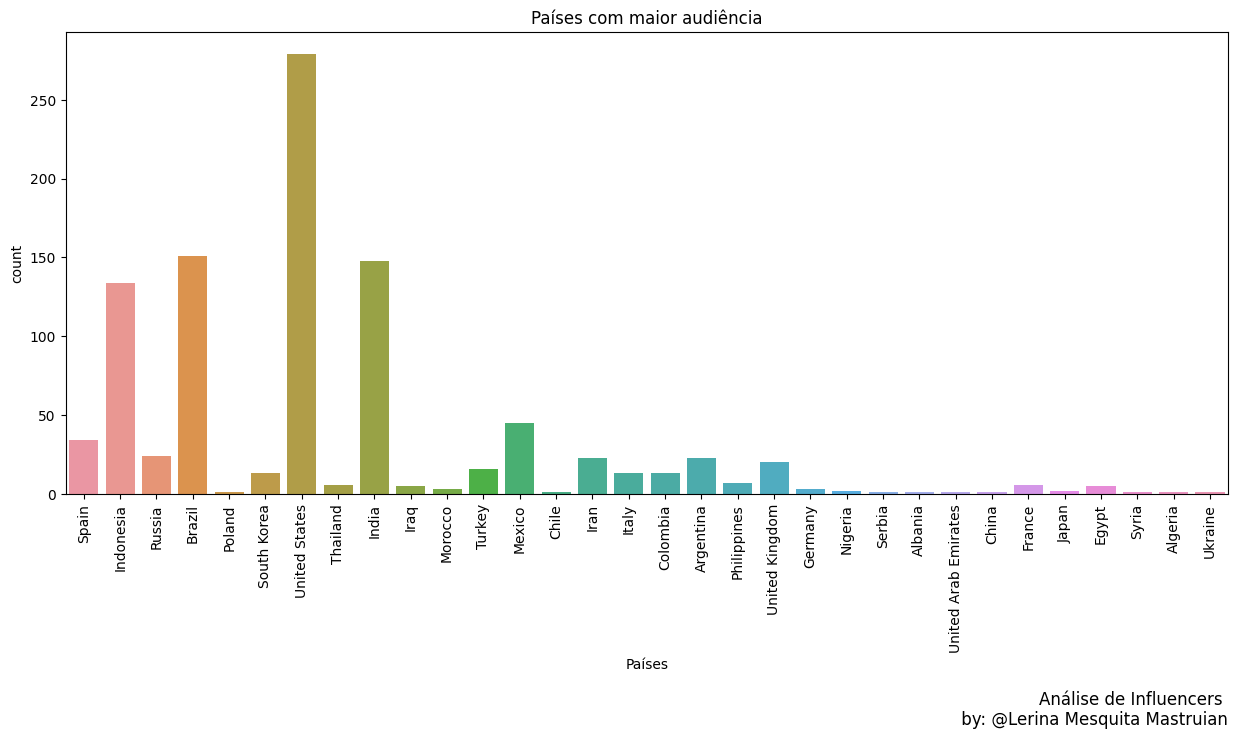

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Audience Country', data=Dados)
plt.xticks(rotation = 90)
plt.title('Países com maior audiência')
plt.xlabel('Países')
plt.annotate(
    'Análise de Influencers \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.50), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

# Entender sobre as demandas de produtos

In [52]:
def demanda(Dados,category):
    return Dados[Dados['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh()

<Axes: >

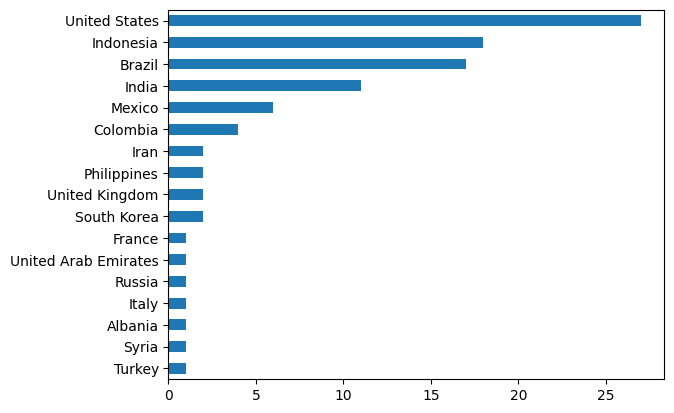

In [54]:
demanda(Dados, 'Lifestyle')

Conclusão: para uma determinada categoria, podemos escolher o país onde um grande público gosta dessa categoria específica .
por exemplo, se você deseja fazer um anúncio sobre algum produto que impacte a parte de Lyfestyle voce pode focar nos Estados Unidos

# Taxa de engajamento

In [ ]:
#é uma métrica utilizada para medir o nível de envolvimento do público com uma determinada publicação ou perfil em uma rede social, como o Instagram.

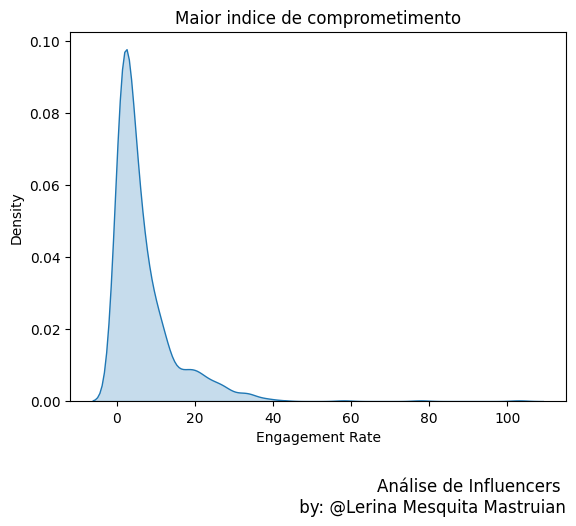

In [37]:
plt.title('Maior indice de Engajamento')
sns.kdeplot(x='Engagement Rate', data=Dados, shade=True);
plt.annotate('Análise de Influencers \n by: @Lerina Mesquita Mastruian',
    xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12);
plt.show()

In [38]:
Dados['newFollowers'].info()

<class 'pandas.core.series.Series'>
Int64Index: 997 entries, 0 to 999
Series name: newFollowers
Non-Null Count  Dtype  
--------------  -----  
997 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


# Considerações sobre a quantidade de seguidores que podemos considerar como mega celebridades

In [55]:
Dados['newFollowers'].quantile(0.94)

61.62399999999999

Com este resultado podemos considerar que mais de 61M de seguidores, seria uma mega celebridade

# Sugestões de mini influencers com engajamento para realizar anuncios, considerando a audiencia do Pais

In [57]:
def for_mini_followers_instagram(coun,cat):
    Dados_1 =Dados[Dados['Audience Country']==coun]
    Dados_2 =Dados_1[Dados_1['newFollowers']<60]
    return Dados_2.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

1. Considerando Audiencia Brasil, categoria Musica

In [58]:
for_mini_followers_instagram('Brazil','Music')

,instagram name,Audience Country,Engagement Rate
201,Conan Gray,Brazil,21.053
413,LIM JAE BEOM,Brazil,11.086
549,Melanie Martinez,Brazil,10.811
345,NaN,Brazil,9.007
561,Louis Tomlinson,Brazil,8.242
875,Tainá Costa,Brazil,6.403
113,BamBam,Brazil,5.394
796,Sabrina Carpenter,Brazil,4.797
530,Leigh-Anne Pinnock,Brazil,4.682
314,Gaten Matarazzo,Brazil,4.368


In [67]:
influenciadores_brasil = Dados[Dados['Audience Country'] == 'Brazil']

In [68]:
influenciadores_brasil.head()

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
5,HWASA,NaN,7.9M,Brazil,7.9,15.190
33,Alê Oliveira,Humor & Fun & Happiness,8.3M,Brazil,8.3,7.210
38,Alfinetadas Dos Famosos 📌,Humor & Fun & Happiness,21.1M,Brazil,21.1,1.060
42,Alisha Lehmann,Sports with a ball,6.8M,Brazil,6.8,10.372
44,Alok,Music,27M,Brazil,27.0,1.185


2. Considerando Audiencia Brasil, categoria Sports With a Ball

In [59]:
for_mini_followers_instagram('Brazil','Sports with a ball')

,instagram name,Audience Country,Engagement Rate
42,Alisha Lehmann,Brazil,10.372
940,Vinicius Jr. ⚡️🇧🇷,Brazil,9.494
310,Gabi 🇧🇷 Lil Gabi,Brazil,4.448
724,Philippe Coutinho,Brazil,3.024
782,ROBERTO FIRMINO,Brazil,1.628
715,Paul Labile Pogba,Brazil,1.190
902,Thiago Silva,Brazil,1.096
740,Paris Saint-Germain,Brazil,0.853
570,Luis Suarez,Brazil,0.829
465,Kaká,Brazil,0.760


In [60]:
for_mini_followers_instagram('Brazil','Cinema & Actors/actresses')

,instagram name,Audience Country,Engagement Rate
400,Jacob Elordi,Brazil,12.121
926,Úrsula Corberó ✨,Brazil,11.789
626,Miguel Herrán,Brazil,10.563
691,Noah Schnapp,Brazil,8.458
717,Paul Wesley,Brazil,7.852
542,Lili Reinhart,Brazil,7.586
898,Joseph Morgan,Brazil,6.591
329,Grant Gustin,Brazil,6.247
165,camila mendes,Brazil,5.970
419,Jennifer Aniston,Brazil,5.736


In [61]:
for_mini_followers_instagram('Brazil','Lifestyle')

,instagram name,Audience Country,Engagement Rate
55,AB Mcn,Brazil,12.243
513,L7,Brazil,8.062
375,Michele Morrone,Brazil,7.278
376,Paulo André 🏁,Brazil,6.957
609,MATUÊ,Brazil,6.690
560,Victor Augusto,Brazil,6.272
861,STHE ⚓️,Brazil,6.085
749,Rafael Uccman,Brazil,5.499
932,Vanessa Lopes,Brazil,5.280
47,ALVARO,Brazil,4.616


In [62]:
for_mini_followers_instagram('Brazil','Shows')

,instagram name,Audience Country,Engagement Rate
522,Lara Silva 💦,Brazil,7.143
945,Virginia Fonseca Costa,Brazil,5.866
955,William Levy / Actor Producer,Brazil,5.043
158,BY PAMELLA ✨🧿,Brazil,4.328
65,Angelique Boyer,Brazil,2.235
318,GKAY,Brazil,1.854
162,Camila Loures,Brazil,1.115
675,Netflix Brasil,Brazil,0.594


In [63]:
for_mini_followers_instagram('India','Music')

,instagram name,Audience Country,Engagement Rate
705,Olivia Rodrigo,India,15.284
992,Zayn Malik,India,12.918
242,djsnake,India,4.721
118,Bebe Rexha,India,3.028
876,Tamannaah Bhatia,India,2.528
216,Darshan Raval #Goriye,India,1.683
604,marshmello,India,1.392
581,Madhuri Dixit,India,1.121
824,shreyaghoshal,India,0.601
333,Guru Randhawa,India,0.430
